In [4]:
#Let's start with importing necessary libraries 
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


ModuleNotFoundError: No module named 'sklearn'

In [93]:
# lets load the dataset
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [95]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


as we can see that Glucose,BloodPressure,SkinThickness,Insulin,BMI some of the values are 0, it can"t be 0, so we have replce it with their mean values


In [97]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())

<AxesSubplot:>

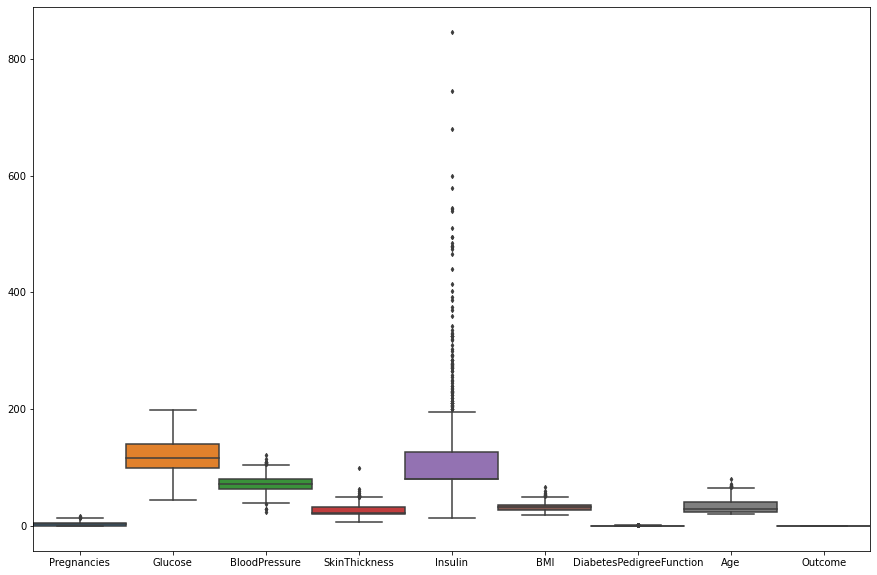

In [98]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=1,fliersize=3)

In [105]:
## segregrate the independent and dependent features
X=data.drop(columns=["Outcome"])
y=data["Outcome"]

In [106]:
X.shape,y.shape

((768, 8), (768,))

In [107]:
# separate dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
                                            

In [108]:
X_train.shape,X_test.shape,y_train.shape

((576, 8), (192, 8), (576,))

In [127]:
import pickle 
def scaler_standard(X_train,X_test):
    #scaling the data
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    # saving the model
    file=open("scalar_standard.pkl","wb")
    pickle.dump(scaler,file)
    file.close()
    return X_train_scaled,X_test_scaled
    

In [128]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [129]:
X_train_scaled.shape,X_test_scaled.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [130]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [131]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
parameters={
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}




In [132]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [133]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [134]:
y_pred=clf.predict(X_test_scaled)

In [135]:
accuracy_score = accuracy_score(y_test,y_pred)

TypeError: 'numpy.float64' object is not callable

In [ ]:
accuracy_score

In [ ]:
confusion_matrix=confusion_matrix(y_test,y_pred)

In [ ]:
confusion_matrix

In [ ]:
true_positive=confusion_matrix[0][0]
true_negative=confusion_matrix[1][1]
false_negative=confusion_matrix[1][0]
false_positive=confusion_matrix[0][1]

In [ ]:
Accuracy=(true_positive+true_negative)/(true_negative+true_positive+false_negative+false_positive)
Accuracy

In [ ]:
Precision = true_positive/(true_positive+false_positive)
Precision

In [ ]:
Recall = true_positive/(true_positive+false_negative)
Recall

In [ ]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

In [ ]:
import pickle
file = open("MOdelprediction.pkl",'wb')
pickle.dump(log_reg,file)
file.close()